# Working Through "Asymptotic formulae for likelihood-based tests of new physics" as Laid Out by Cowan, Cranmer, Gross, and Vitells
- Cole Kampa
- 02-01-2021
- Paper: https://arxiv.org/abs/1007.1727

# Imports

In [148]:
# import time
# from copy import deepcopy
import numpy as np
# import pandas as pd
from scipy.stats import norm, poisson, chi2, ncx2
# from tqdm.notebook import tqdm
# from joblib import Parallel, delayed
# import multiprocessing
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
#from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter, FuncFormatter, MultipleLocator
#import matplotlib.colors as mcolors

from plot_config import config_plots

In [165]:
config_plots()
plt.rcParams.update({'font.size': 18.0})
plt.rc('text', usetex=True)

# Scratch

## Section 2: Formalism of a search as a statistical test

### Using median instead of expectation
- Paragraph 5 states that sensitivity to discovery given some signal process $H_1$ can be characterized by expectation value, under assumption of $H_1$, of the value of $Z$ obtained from a test of $H_0$, but that Eqn. 1 (which uses the $p$ value of a particular measurement) does not hold as "$Z$ obtained from Eqn. 1 using expectation of $p$-value". The stated reason is $p$ and $Z$ have a non-linear relationship, but that Eq. 1 will hold for **median** $Z$ and $p$, since the relationship is monotonic.
- Verify these statements.

In [5]:
def Z(p):
    return norm.ppf(1-p, loc=0, scale=1)

In [7]:
# check 5 sigma and p=0.05
Z(2.87e-7), Z(0.05)

(4.9997657768508095, 1.6448536269514722)

In [8]:
ps = np.linspace(1e-8, 1, 1000)
Zs = Z(ps)

In [9]:
Zs

array([ 5.61200124e+00,  3.08993219e+00,  2.87784455e+00,  2.74745222e+00,
        2.65173114e+00,  2.57548264e+00,  2.51179067e+00,  2.45690347e+00,
        2.40854992e+00,  2.36524724e+00,  2.32597209e+00,  2.28998749e+00,
        2.25674451e+00,  2.22582291e+00,  2.19689358e+00,  2.16969380e+00,
        2.14401042e+00,  2.11966800e+00,  2.09652036e+00,  2.07444440e+00,
        2.05333540e+00,  2.03310356e+00,  2.01367122e+00,  1.99497079e+00,
        1.97694305e+00,  1.95953582e+00,  1.94270285e+00,  1.92640300e+00,
        1.91059945e+00,  1.89525915e+00,  1.88035230e+00,  1.86585195e+00,
        1.85173362e+00,  1.83797503e+00,  1.82455581e+00,  1.81145732e+00,
        1.79866246e+00,  1.78615544e+00,  1.77392175e+00,  1.76194792e+00,
        1.75022151e+00,  1.73873094e+00,  1.72746546e+00,  1.71641504e+00,
        1.70557033e+00,  1.69492258e+00,  1.68446359e+00,  1.67418568e+00,
        1.66408164e+00,  1.65414469e+00,  1.64436844e+00,  1.63474688e+00,
        1.62527431e+00,  

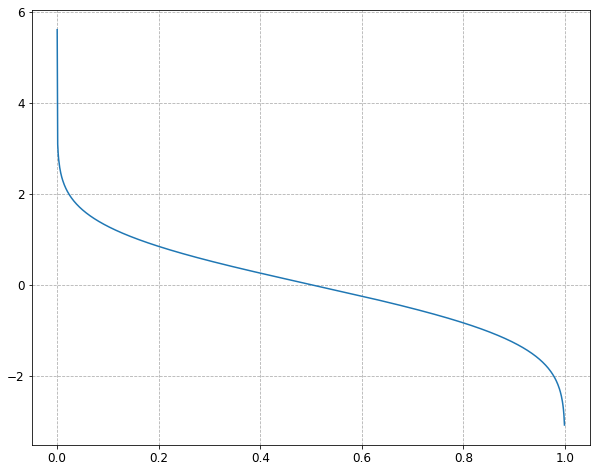

In [10]:
plt.plot(ps, Zs)

- Suppose expected number of events under $H_1$ is 100 and expected number of events under $H_0$ is 50
- Let's see what we get for sensitivity both by using "expectation" and "median"

In [29]:
N = 100000 # number of experiments
mu1 = 100
mu0 = 75

In [30]:
#ns = np.random.normal(loc=0, scale=1, size=N)
ns = np.random.poisson(lam=mu1, size=N)

In [31]:
ns

array([ 77,  91,  87, ...,  95, 105,  94])

In [32]:
p_vals = poisson.sf(k=ns, mu=mu0)

In [33]:
np.mean(p_vals)

0.026591553978933303

In [34]:
Z_vals = Z(p_vals)

In [35]:
Z_vals

array([0.30626201, 1.85973923, 1.42460501, ..., 2.28847804, 3.33447581,
       2.181874  ])

In [36]:
np.sum(np.isinf(Z_vals))

0

In [37]:
np.mean(Z_vals)

2.797764968547068

In [38]:
Z(np.mean(p_vals))

1.933431142296384

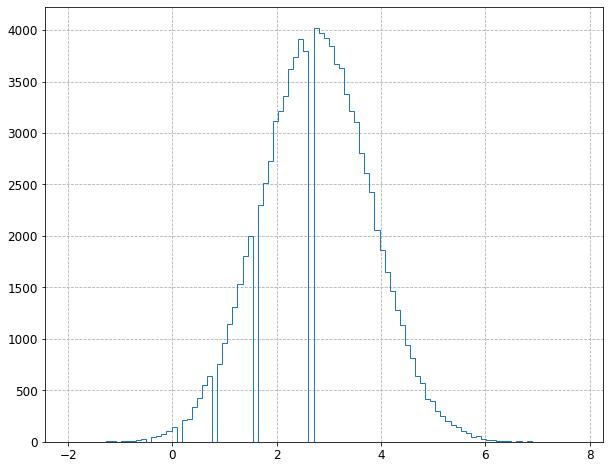

In [40]:
plt.hist(Z_vals, bins=100, histtype='step');

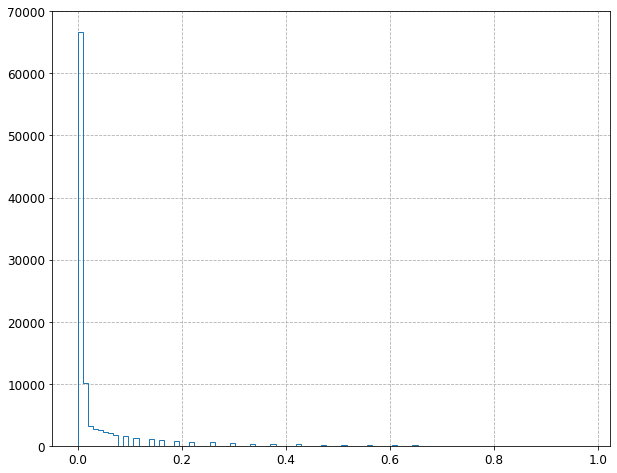

In [41]:
plt.hist(p_vals, bins=100, histtype='step');

In [43]:
np.median(p_vals), np.median(Z_vals)

(0.00243191447618269, 2.815916610274124)

In [44]:
Z(np.median(p_vals))

2.815916610274124

- My test agrees with the paper's statement. Would like to think more and make sure mathematical reason is clear.

## Section 3:

#### Checking Approximated Distribution

In [45]:
def t_mu(mu, mu_hat, sigma):
    return (mu - mu_hat)**2 / sigma**2

In [88]:
lam = (mu-mu_prime)**2 / sigma**2
def f_t_mu(tmu, mu, muprime, sigma):
    lam = (mu-muprime)**2/sigma**2
    f = 1/(2*tmu**(1/2)) * 1 / (2*np.pi)**(1/2) *\
    (np.exp(-1/2 * (tmu**(1/2) + lam**(1/2))**2) + np.exp(-1/2 * (tmu**(1/2) - lam**(1/2))**2))
    return f

# def f_t_mu(tmu, mu, muprime, sigma):
#     lam = (mu-muprime)**2/sigma**2
#     f = 1/(2*tmu**(1/2)) * 1 / (2*np.pi)**(1/2) *\
#     (np.exp(-1/2 * (tmu**(1/2) - lam**(1/2))**2))
#     return f

In [89]:
# generate mu_hat, mean mu_prime, std sigma
N = 1000000
mu_prime = 3.
sigma= 1.
mu_hats = np.random.normal(loc=mu_prime, scale=sigma, size=N)
mus = 10 # 5
#mus = np.random.uniform(low=0, high=10, size=N)

In [90]:
t_mus = t_mu(mus, mu_hats, sigma)

In [91]:
# suppose mu fixed
#mu = 5

tmus = np.linspace(1e-2, 80, 81)
#mus_ = tmus**(1/2)*sigma + mu
fs = f_t_mu(tmus, mus, mu_prime, sigma)

In [92]:
#fs

mean: 3.00, std: 1.00


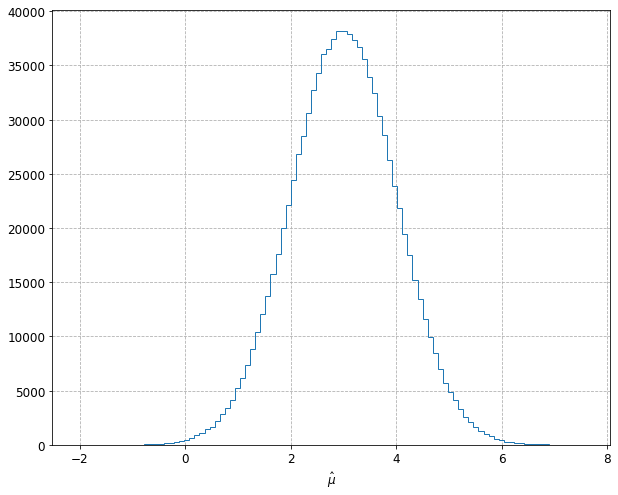

In [93]:
print(f'mean: {np.mean(mu_hats):0.2f}, std: {np.std(mu_hats):0.2f}')
plt.hist(mu_hats, bins=100, histtype='step');
plt.xlabel(r'$\hat{\mu}$');

mean: 50.01, std: 14.08


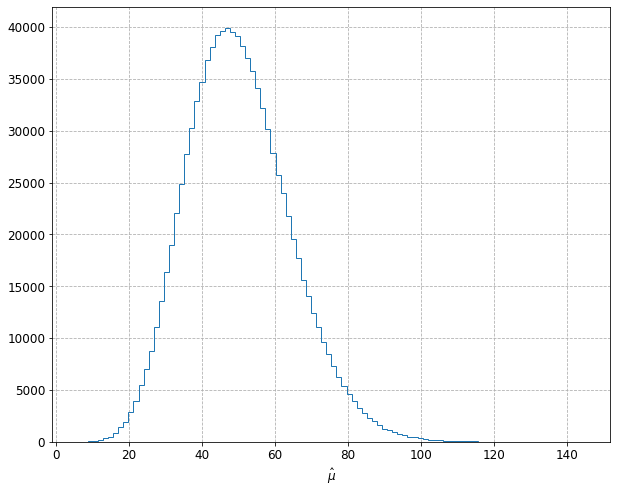

In [94]:
print(f'mean: {np.mean(t_mus):0.2f}, std: {np.std(t_mus):0.2f}')
plt.hist(t_mus, bins=100, histtype='step');
plt.xlabel(r'$\hat{\mu}$');

mean: 50.01, std: 14.08


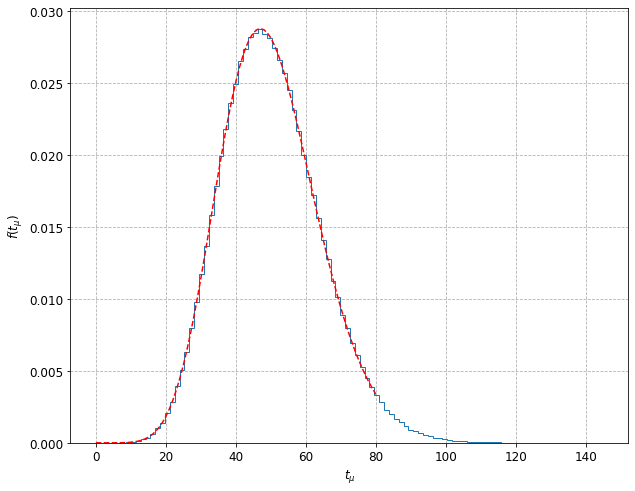

In [95]:
print(f'mean: {np.mean(t_mus):0.2f}, std: {np.std(t_mus):0.2f}')
plt.hist(t_mus, bins=100, histtype='step', density=1);
plt.plot(tmus, fs, 'r--')
plt.xlabel(r'$t_\mu$')
plt.ylabel(r'$f(t_\mu)$');

- This looks to be true for a few test cases.
- Still not sure why there are two exponential terms instead of one.

In [97]:
# using scipy for non-central chi2, 1 DOF
fs2 = ncx2.pdf(tmus, df=1, nc=(mus-mu_prime)**2/sigma**2)

In [101]:
tmus

array([1.0000000e-02, 1.0098750e+00, 2.0097500e+00, 3.0096250e+00,
       4.0095000e+00, 5.0093750e+00, 6.0092500e+00, 7.0091250e+00,
       8.0090000e+00, 9.0088750e+00, 1.0008750e+01, 1.1008625e+01,
       1.2008500e+01, 1.3008375e+01, 1.4008250e+01, 1.5008125e+01,
       1.6008000e+01, 1.7007875e+01, 1.8007750e+01, 1.9007625e+01,
       2.0007500e+01, 2.1007375e+01, 2.2007250e+01, 2.3007125e+01,
       2.4007000e+01, 2.5006875e+01, 2.6006750e+01, 2.7006625e+01,
       2.8006500e+01, 2.9006375e+01, 3.0006250e+01, 3.1006125e+01,
       3.2006000e+01, 3.3005875e+01, 3.4005750e+01, 3.5005625e+01,
       3.6005500e+01, 3.7005375e+01, 3.8005250e+01, 3.9005125e+01,
       4.0005000e+01, 4.1004875e+01, 4.2004750e+01, 4.3004625e+01,
       4.4004500e+01, 4.5004375e+01, 4.6004250e+01, 4.7004125e+01,
       4.8004000e+01, 4.9003875e+01, 5.0003750e+01, 5.1003625e+01,
       5.2003500e+01, 5.3003375e+01, 5.4003250e+01, 5.5003125e+01,
       5.6003000e+01, 5.7002875e+01, 5.8002750e+01, 5.9002625e

In [100]:
fs

array([1.14084329e-10, 3.11368749e-09, 2.40682989e-08, 1.09864682e-07,
       3.75670335e-07, 1.06207541e-06, 2.61637564e-06, 5.79840219e-06,
       1.18078618e-05, 2.24262884e-05, 4.01629917e-05, 6.83913557e-05,
       1.11459952e-04, 1.74762533e-04, 2.64752218e-04, 3.88888023e-04,
       5.55506145e-04, 7.73613660e-04, 1.05260811e-03, 1.40193227e-03,
       1.83067871e-03, 2.34716309e-03, 2.95848832e-03, 3.67012301e-03,
       4.48551768e-03, 5.40578048e-03, 6.42943100e-03, 7.55224661e-03,
       8.76721068e-03, 1.00645666e-02, 1.14319761e-02, 1.28547748e-02,
       1.43163144e-02, 1.57983755e-02, 1.72816333e-02, 1.87461580e-02,
       2.01719278e-02, 2.15393358e-02, 2.28296732e-02, 2.40255713e-02,
       2.51113891e-02, 2.60735367e-02, 2.69007272e-02, 2.75841520e-02,
       2.81175805e-02, 2.84973852e-02, 2.87224976e-02, 2.87943004e-02,
       2.87164661e-02, 2.84947494e-02, 2.81367448e-02, 2.76516191e-02,
       2.70498281e-02, 2.63428276e-02, 2.55427870e-02, 2.46623124e-02,
      

In [99]:
fs2

array([1.14084329e-10, 3.11368749e-09, 2.40682989e-08, 1.09864682e-07,
       3.75670335e-07, 1.06207541e-06, 2.61637564e-06, 5.79840219e-06,
       1.18078618e-05, 2.24262884e-05, 4.01629917e-05, 6.83913557e-05,
       1.11459952e-04, 1.74762533e-04, 2.64752218e-04, 3.88888023e-04,
       5.55506145e-04, 7.73613660e-04, 1.05260811e-03, 1.40193227e-03,
       1.83067871e-03, 2.34716309e-03, 2.95848832e-03, 3.67012301e-03,
       4.48551768e-03, 5.40578048e-03, 6.42943100e-03, 7.55224661e-03,
       8.76721068e-03, 1.00645666e-02, 1.14319761e-02, 1.28547748e-02,
       1.43163144e-02, 1.57983755e-02, 1.72816333e-02, 1.87461580e-02,
       2.01719278e-02, 2.15393358e-02, 2.28296732e-02, 2.40255713e-02,
       2.51113891e-02, 2.60735367e-02, 2.69007272e-02, 2.75841520e-02,
       2.81175805e-02, 2.84973852e-02, 2.87224976e-02, 2.87943004e-02,
       2.87164661e-02, 2.84947494e-02, 2.81367448e-02, 2.76516191e-02,
       2.70498281e-02, 2.63428276e-02, 2.55427870e-02, 2.46623124e-02,
      

In [104]:
all(np.isclose(fs, fs2))

True

In [105]:
mu_hats

array([2.91461313, 3.86947664, 3.06710791, ..., 1.21519701, 0.83724275,
       2.90552474])

In [109]:
muhs = np.linspace(-20, 20, 401)
tmus_ = (mus-muhs)**2/sigma**2

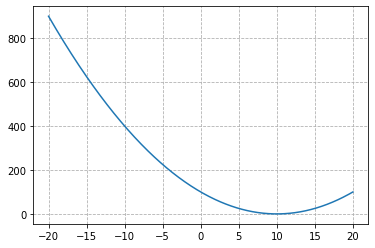

In [110]:
plt.plot(muhs, tmus_)

In [108]:
mus

10

- Note: going from $t_\mu$ to $f(t_\mu)$ is done by using theorems surrounding functions of continuous random variables where the function is not monotone (e.g. https://www.probabilitycourse.com/chapter4/4_1_3_functions_continuous_var.php)

# Examples

## Counting Experiment

### Asymptotic Approx.

In [194]:
# likelihood is product of two poissonion variables
# drop factorials -- they cancel in likelihood ratio
def L(mu, b, s, n, m, tau):
    return (mu*s+b)**n * np.exp(-(mu*s+b)) * (tau*b)**m * np.exp(-(tau*b))

# estimator functions
def muhat(n, m, tau, s):
    return (n-m/tau)/s

def bhat(m, tau):
    return m/tau

def bhat2(n, m, tau, s, mu):
    return (n+m - (1+tau)*mu*s) / (2*(1+tau)) + (((n+m-(1+tau)*mu*s)**2 + 4*(1+tau)*m*mu*s)/(4*(1+tau)**2))**(1/2)

# approximation for PDF
# does not handle q0 = 0 --> delta
def f_q0(q0, muprime, sigma):
    return 1 / (2 *(2*np.pi*q0)**(1/2)) * np.exp(-1/2 * (q0**(1/2) - muprime/sigma)**2)

In [198]:
# find sigma from Asimov dataset
def q0_asimov(muprime, s, b, tau):
    nA = muprime * s + b
    mA = tau * b
    bh2 = bhat2(nA, mA, tau, s, 0) # assuming mu = 0 for q0
    bh = bhat(mA, tau)
    muh = muhat(nA, mA, tau, s)
    # calculate appropriate likelihood ratio
    q0A = -2 * np.log(L(0, bh2, s, nA, mA, tau)/L(muh, bh, s, nA, mA, tau))
    return q0A

In [199]:
q0_asimov(1, 10, 10, 1)

3.3979807359079497

In [197]:
def sigma_q0A(q0A, muprime):
    return muprime/q0A**(1/2)

In [201]:
sigma = sigma_q0A(q0_asimov(1, 10, 10, 1), 1)

In [202]:
sigma

0.5424872603903432

In [218]:
#q0s_asym = np.linspace(1e-2, 40, 4000)
q0s_asym = np.linspace(1e-1, 40, 400)

In [219]:
fq0_0 = f_q0(q0s_asym, 0, 1) # sigma=1 is a kludge
fq0_1 = f_q0(q0s_asym, 1, sigma)

In [220]:
## DIGITIZED FIG 3a
qs = np.array([0.1982,1.9273,3.5484,5.4463,7.2058,9.964,12.3071,14.7368,
               18.1953, 21.7447, 24.879, 28.2986, 30.1144])
fs = np.array([.387, .05402, .017712, .005567, .002001, .0004389,
               .00012064, 3.232e-5, 5.221e-6, 8.141e-7, 1.58e-7,
               2.6318e-8, 1.0516e-8])

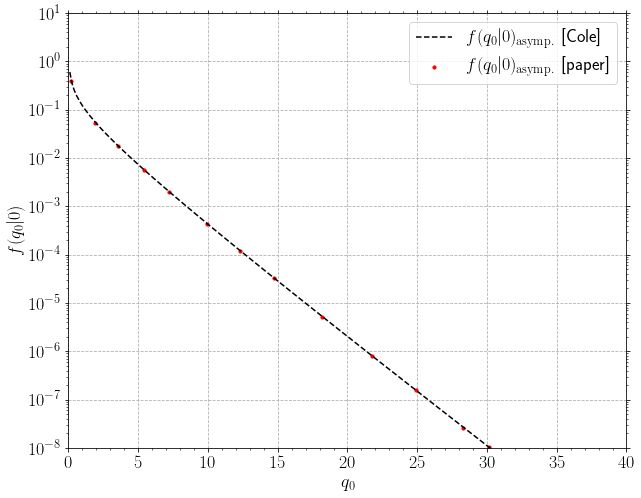

In [221]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5.))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=1.))
ax.xaxis.set_ticks_position('both')
ax.set_yscale('log')
ax.yaxis.set_major_locator(ticker.LogLocator(base=10., numticks=12))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.,subs=(0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=12))
ax.yaxis.set_ticks_position('both')
ax.plot(q0s_asym, fq0_0, 'k--', label=r'$f(q_0|0)_{\mathrm{asymp.}}$ [Cole]')
ax.scatter(qs, fs, s=10, c='red', label=r'$f(q_0|0)_{\mathrm{asymp.}}$ [paper]')

ax.set_xlim([0,40])
ax.set_ylim([1e-8,10])
ax.set_xlabel(r'$q_0$')
ax.set_ylabel(r'$f(q_0|0)$')
ax.legend()

- Looks good.

### Monte Carlo

In [195]:
# # likelihood is product of two poissonion variables
# # drop factorials -- they cancel in likelihood ratio
# def L(mu, b, s, n, m, tau):
#     return (mu*s+b)**n * np.exp(-(mu*s+b)) * (tau*b)**m * np.exp(-(tau*b))

# # estimator functions
# def muhat(n, m, tau, s):
#     return (n-m/tau)/s

# def bhat(m, tau):
#     return m/tau

# def bhat2(n, m, tau, s, mu):
#     return (n+m - (1+tau)*mu*s) / (2*(1+tau)) + (((n+m-(1+tau)*mu*s)**2 + 4*(1+tau)*m*mu*s)/(4*(1+tau)**2))**(1/2)

In [249]:
def gen_q0s(mu, s, b, tau, N):
    # generate n and m bin values for N experiments
    ns = np.random.poisson(lam=mu*s+b, size=N)
    ms = np.random.poisson(lam=tau*b, size=N)
    # calculate ML estimators
    bh2s = bhat2(ns, ms, tau, s, 0) # assuming mu = 0 for q0
    bhs = bhat(ms, tau)
    muhs = muhat(ns, ms, tau, s)
    # calculate appropriate likelihood ratio
    q0s = np.zeros(N)
    #q0s[muhs<0] = 0
    c = muhs>=0
    q0s[c] = -2 * np.log(L(0, bh2s[c], s, ns[c], ms[c], tau)/L(muhs[c], bhs[c], s, ns[c], ms[c], tau))
    # calculate appropriate likelihood ratio
    #q0s = -2 * np.log(L(0, bh2s, s, ns, ms, tau)/L(muhs, bhs, s, ns, ms, tau))
    return q0s

- Figure 3a

In [250]:
N = 10000000
mu=0; s=10; tau=1
#bs = [0.5, 1, 2, 5, 20]
bs = [2, 5, 20]
q0s_list = []
for b in bs:
    q0s_list.append(gen_q0s(mu, s, b, tau, N))

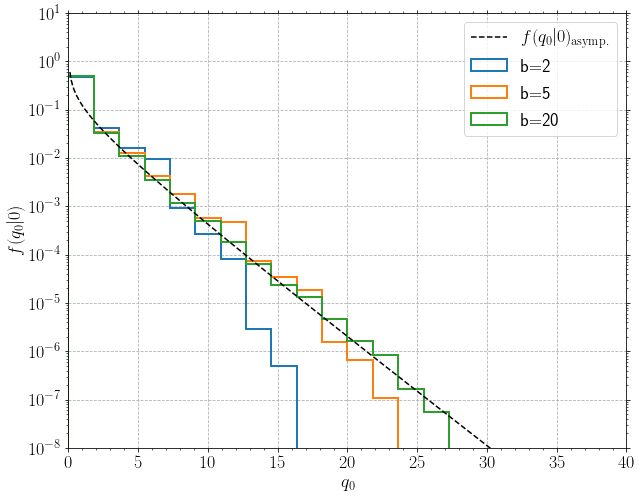

In [252]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5.))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=1.))
ax.xaxis.set_ticks_position('both')
ax.set_yscale('log')
ax.yaxis.set_major_locator(ticker.LogLocator(base=10., numticks=12))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.,subs=(0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=12))
ax.yaxis.set_ticks_position('both')
ax.plot(q0s_asym, fq0_0, 'k--', label=r'$f(q_0|0)_{\mathrm{asymp.}}$')
for b, q in zip(bs, q0s_list): 
    ax.hist(q, bins=np.linspace(0,40,23), linewidth=2, histtype="step", density=1, label=f'b={b}')

ax.set_xlim([0,40])
ax.set_ylim([1e-8,10])
ax.set_xlabel(r'$q_0$')
ax.set_ylabel(r'$f(q_0|0)$')
ax.legend()

- Figure 3b

In [253]:
N = 10000000
s=10; b=10; tau=1 # paper
#s=7; b=0.5; tau=1 # Mu2e
q0s_0 = gen_q0s(0, s, b, tau, N)
q0s_1 = gen_q0s(1, s, b, tau, N)

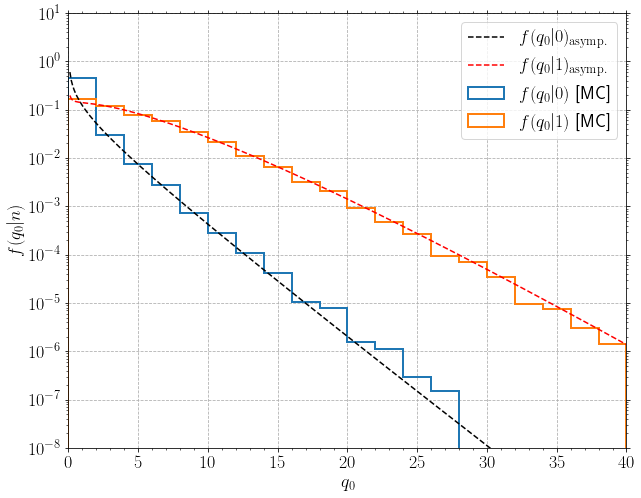

In [255]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5.))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=1.))
ax.xaxis.set_ticks_position('both')
ax.set_yscale('log')
ax.yaxis.set_major_locator(ticker.LogLocator(base=10., numticks=12))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.,subs=(0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=12))
ax.yaxis.set_ticks_position('both')
ax.plot(q0s_asym, fq0_0, 'k--', label=r'$f(q_0|0)_{\mathrm{asymp.}}$')
ax.plot(q0s_asym, fq0_1, 'r--', label=r'$f(q_0|1)_{\mathrm{asymp.}}$')
ax.hist(q0s_0, bins=np.linspace(0,40,21), linewidth=2, histtype="step", density=1, label=r'$f(q_0|0)$ [MC]')
ax.hist(q0s_1, bins=np.linspace(0,40,21), linewidth=2, histtype="step", density=1, label=r'$f(q_0|1)$ [MC]')
# ax.hist(q0s_0, bins=np.linspace(0,40,41), linewidth=2, histtype="step", density=False, label=r'$f(q_0|0)$ [MC]')
# ax.hist(q0s_1, bins=np.linspace(0,40,41), linewidth=2, histtype="step", density=False, label=r'$f(q_0|1)$ [MC]')


ax.set_xlim([0,40])
ax.set_ylim([1e-8,10])
ax.set_xlabel(r'$q_0$')
ax.set_ylabel(r'$f(q_0|n)$')
ax.legend()

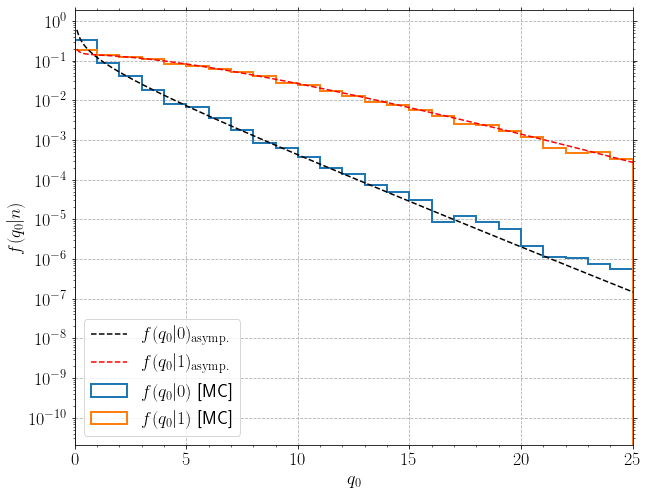

In [242]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5.))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=1.))
ax.xaxis.set_ticks_position('both')
ax.set_yscale('log')
ax.yaxis.set_major_locator(ticker.LogLocator(base=10., numticks=12))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.,subs=(0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=12))
ax.yaxis.set_ticks_position('both')
ax.plot(q0s_asym, fq0_0, 'k--', label=r'$f(q_0|0)_{\mathrm{asymp.}}$')
ax.plot(q0s_asym, fq0_1, 'r--', label=r'$f(q_0|1)_{\mathrm{asymp.}}$')
ax.hist(np.concatenate([q0s_0[q0s_0<25],40*np.ones(10000000)]), bins=np.linspace(0,40,41), linewidth=2, histtype="step", density=1, label=r'$f(q_0|0)$ [MC]')
ax.hist(q0s_1[q0s_1<25], bins=np.linspace(0,25,26), linewidth=2, histtype="step", density=1, label=r'$f(q_0|1)$ [MC]')
# ax.hist(q0s_0, bins=np.linspace(0,40,41), linewidth=2, histtype="step", density=False, label=r'$f(q_0|0)$ [MC]')
# ax.hist(q0s_1, bins=np.linspace(0,40,41), linewidth=2, histtype="step", density=False, label=r'$f(q_0|1)$ [MC]')

ax.set_xlim([0,25])

#ax.set_xlim([0,40])
#ax.set_ylim([1e-8,10])
ax.set_xlabel(r'$q_0$')
ax.set_ylabel(r'$f(q_0|n)$')
ax.legend()

In [231]:
def F(q0, muprime, sigma):
    return norm.cdf(q0**(1/2) - muprime/sigma)

In [232]:
F(25, 0, 1)

0.9999997133484281

In [233]:
F(25, 1, sigma)

0.9992020052895808

In [248]:
1-norm.cdf(1/sigma)

0.032638141154440636

In [230]:
norm

In [146]:
N = 1000000
s=10; b=10; tau=1
q0s_0 = gen_q0s(0, s, b, tau, N)
q0s_1 = gen_q0s(1, s, b, tau, N)

In [ ]:
plt.hist(q0s, bins=np.linspace(0,40,25), histtype="step", density=1, label='')
plt.hist(q0s, bins=np.linspace(0,40,25), histtype="step", density=1)
plt.xlabel(r'$q_0$')

In [111]:
N = 1000000
mu = 1; s=10; b=10; tau=1

In [112]:
# generate n and m bin values for N experiments
ns = np.random.poisson(lam=mu*s+b, size=N)
ms = np.random.poisson(lam=tau*b, size=N)

In [113]:
# likelihood is product of two poissonion variables
# drop factorials -- they cancel in likelihood ratio
def L(mu, b, s, n, m, tau):
    return (mu*s+b)**n * np.exp(-(mu*s+b)) * (tau*b)**m * np.exp(-(tau*b))

In [115]:
# estimator functions
def muhat(n, m, tau, s):
    return (n-m/tau)/s

def bhat(m, tau):
    return m/tau

def bhat2(n, m, tau, s, mu):
    return (n+m - (1+tau)*mu*s) / (2*(1+tau)) + (((n+m-(1+tau)*mu*s)**2 + 4*(1+tau)*m*mu*s)/(4*(1+tau)**2))**(1/2)

In [140]:
# calculate ML estimators
bh2s = bhat2(ns, ms, tau, s, 0)
bhs = ms/tau
muhs = (ns-ms/tau)/s

In [141]:
# calculate discovery test statistics
q0s = -2 * np.log(L(0, bh2s, s, ns, ms, tau)/L(muhs, bhs, s, ns, ms, tau))

Text(0.5, 0, '$q_0$')

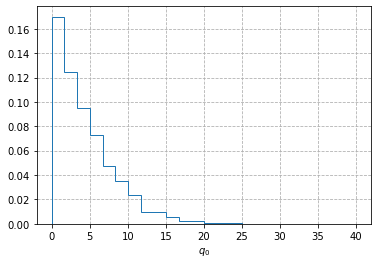

In [142]:
plt.hist(q0s, bins=np.linspace(0,40,25), histtype="step", density=1);
plt.xlabel(r'$q_0$')

In [126]:
#####

In [127]:
Is = np.linspace(0, 200, 2001)

In [128]:
Is

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.998e+02, 1.999e+02,
       2.000e+02])

In [129]:
Bs = 1e-3 * Is

In [130]:
Bs

array([0.000e+00, 1.000e-04, 2.000e-04, ..., 1.998e-01, 1.999e-01,
       2.000e-01])

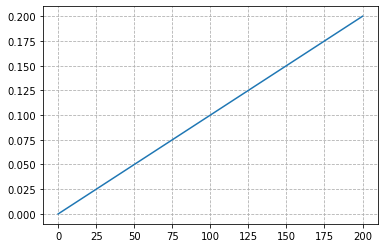

In [131]:
plt.plot(Is, Bs)

In [133]:
cutoff = 65

In [ ]:
for I in Is:
    if I < cutoff:
        B = a + b * I
    else:
        B = c + d * I

In [135]:
Bs = np.zeros_like(Is)

In [136]:
Bs

array([0., 0., 0., ..., 0., 0., 0.])

In [137]:
Bs[Is < cutoff] = a + b * Is[Is < cutoff]
Bs[Is >= cutoff] = c + d * Is[Is >= cutoff]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [134]:
B1 = a + b * Is[Is < cutoff]
B2 = c + d * Is[Is >= cutoff]
B = np.concatenate([B1, B2])

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [138]:
alpha = 0.5
ys = np.cos(Is**alpha)

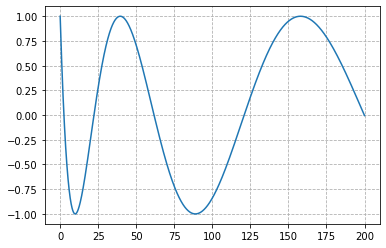

In [139]:
plt.plot(Is, ys)